In [37]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Generating sentiment scores with SentiWordNet


First, we need to load the entire NYTimes article corpus and load the sentiment analysis routine we created (from sentiwordnet.py).

In [8]:
DATA_DIR = "./data/"

In [9]:
all_data_list = []
for year in range(1990,2017):
    data = pd.read_csv(DATA_DIR + '{}_Output.csv'.format(year), header=None, encoding="utf-8")
    all_data_list.append(data) # list of dataframes
data = pd.concat(all_data_list, axis=0)
data.columns = ['id','date','headline', 'lead']

# Drop dupes and fix dates
data = data.drop_duplicates("id").reset_index(drop=True)
data.date = pd.to_datetime(data.date)

# Fill null articles
data.loc[data.lead.isnull(), "lead"] = ""

In [3]:
# Can be found in sentiwordnet.py, or also the SentiWordNet notebook.

# If it complains about missing corpuses, try:
# nltk.download("sentiwordnet")
# nltk.download("stopwords")


import sentiwordnet

We'll subset the data and process it year by year because it is computationally expensive, so we don't want to have to repeat the whole process year by year, and we might also want the intermediate results later.

In [ ]:
import datetime

years = list(reversed(data.date.dt.year.unique()))
years = range(1990, 2017)

for year in years:
    print(year, datetime.datetime.now())
    
    data_subset = data[data.date.dt.year == year].set_index("id")
    
    sentiments_subset = pd.DataFrame(
        map(sentiwordnet.get_sentiment_2, data_subset.lead.values),
        columns=["score", "count"]
    )
    sentiments_subset.index = data_subset.index.copy()
    sentiments_subset.to_csv("./sentiments_{}.csv".format(year))

We can then load these up again later, and take a look at the format:

In [5]:
years = range(1990, 2017)

sentiments = []
for year in years:
    #print(year)
    sentiment = pd.read_csv("./sentiments_{}.csv".format(year))
    sentiments.append(sentiment)
    
sentiments = pd.concat(sentiments)
sentiments.head()

,id,score,count
0,4fd1aa888eb7c8105d6c860e,0.500,26
1,52b85b7738f0d8094087c782,0.125,10
2,52b85b7638f0d8094087c780,0.375,18
3,52b85b7538f0d8094087c77f,-0.250,14
4,4fd18d4c8eb7c8105d691815,0.125,15


In [10]:
data_subset = data[data.date.dt.year.isin(years)].set_index("id")
data_subset = data_subset.join(sentiments.set_index("id"))

We can also view some histograms to see the distribution of the score values and sentiment-word counts:

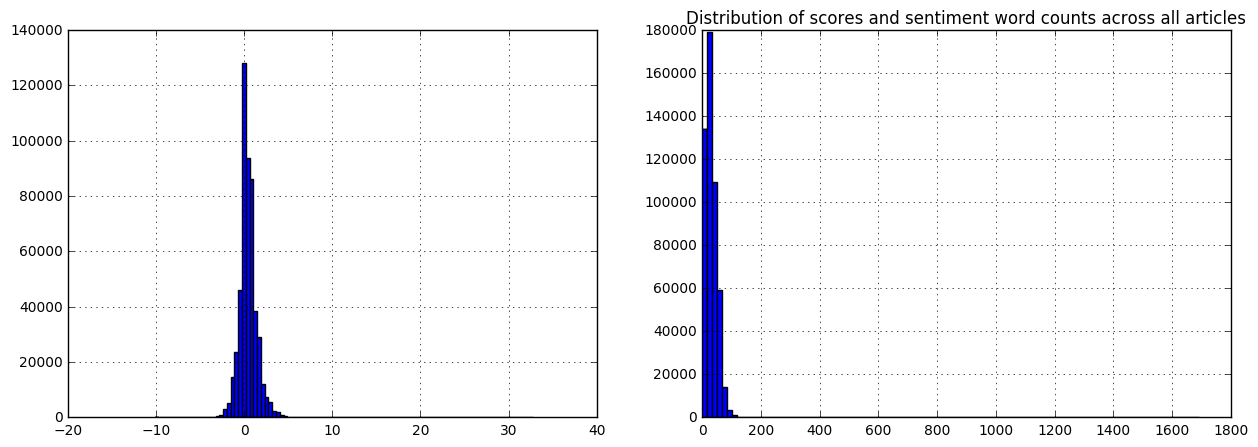

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

data_subset["score"].hist(bins=100, ax=ax[0])
data_subset["count"].hist(bins=100, ax=ax[1])

plt.title("Distribution of scores and sentiment word counts across all articles")

As we can see, the scores are very nicely distributed around 0. Some examples of positive sentiment articles:

In [19]:
data_subset.nlargest(15, "score")

,date,headline,lead,score,count
id,,,,,
4fd20ae28eb7c8105d778279,1998-03-24,"Paid Notice: Deaths MENDELSON, HERBERT",MENDELSON-Herbert. Thanks for the integral par...,32.750,676
4fd1e6608eb7c8105d7327fe,1994-09-04,The Man Carrying the Ball for Murdoch,"""HILL here,"" David Hill answered the telephone...",31.513,1578
4fd20edc8eb7c8105d7807d5,1997-04-27,Should You Roll Out the Welcome Mat for HDTV?,THE Government vote early this month to begin ...,30.625,798
4fd19ee78eb7c8105d6b260b,1992-01-11,Views of Bush's Trip From Corner Offices,American executives from many areas of industr...,29.125,694
4fd21b348eb7c8105d79a6f9,2002-02-17,"Know More, Pay Less",AMERICANS can exercise far more control over h...,27.625,1341
4fd19d798eb7c8105d6afa58,1991-03-03,All About/Medical Supplies; Removing the Wareh...,In the palmy years before the nationwide squee...,27.500,876
4fd1ce308eb7c8105d7060b2,1995-07-31,Windows of Opportunity for Microsoft,"REDMOND, Wash. The Microspft Corporation plans...",26.103,824
4fd2233c8eb7c8105d7a8ece,2002-12-22,Personal Business; It's Dec. 24: Do You Know W...,IF you haven't completed your holiday shopping...,25.375,752
4fd259ae8eb7c8105d8061f4,2004-10-10,"When Incomes Rise, Follow the Money",COMPANIES trying to reach a mass market for th...,24.750,502


Some examples of negative snetiment articles:

In [20]:
data_subset.nsmallest(15, "score")

,date,headline,lead,score,count
id,,,,,
52b85f5d38f0d8094087cc5c,1991-11-28,How the Senate Voted on the S.& L. Bill,Following is the 44-33 roll-call vote by which...,-10.125,284
4fd19cd88eb7c8105d6ae742,1990-11-09,Retail Sales Were Slow Last Month,The nation's largest retail chains reported di...,-8.500,520
4fd237118eb7c8105d7c9875,2000-07-28,STING LOSES ON DOMAIN NAME,The British pop star Sting lost his attempt to...,-8.375,61
4fd27e7f8eb7c8105d8474ec,2004-05-23,Calm Down. That Wolf at the Door Has Been Here...,"LATELY, even more than usual, the word of the ...",-7.250,64
4fd1d0828eb7c8105d70a3df,1993-09-03,F.D.A. APPROVES MYLAN'S ANTI-INFLAMMATORY DRUG,Shares of Mylan Laboratories Inc. shot up yest...,-7.125,60
4fd20a728eb7c8105d777399,2000-09-26,I.R.S. Issues Revised Memo On Kidnapping,"The Internal Revenue Service, which came under...",-7.125,84
4fd260f88eb7c8105d811aa3,2005-09-02,BUSINESS DIGEST,"In Storm's Wake, Turmoil in Energy Market Spur...",-7.125,414
4fd19e168eb7c8105d6b07f1,1991-03-15,Europe Clears Centocor Drug,"Centocor Inc., a biotechnology company based i...",-7.000,41
4fd1a1658eb7c8105d6b6eae,1992-09-06,Business Diary: August 30 - September 4,INTERNATIONAL Failing Pravda Gets a Partner Wh...,-7.000,922


Now, we can aggregate sentiment data up to days:

In [23]:
daily_sentiment = data_subset[["date", "score", "count"]].set_index("date").resample("D").sum()
daily_sentiment["avg_score"] = daily_sentiment["score"] / daily_sentiment["count"]
daily_sentiment.head()

,score,count,avg_score
date,,,
1990-01-01,9.250,535.0,0.017290
1990-01-02,17.875,1020.0,0.017525
1990-01-03,29.875,1291.0,0.023141
1990-01-04,24.500,981.0,0.024975
1990-01-05,22.750,991.0,0.022957


And save the file:

In [64]:
daily_sentiment.to_csv("./daily_sentiment_1990_2016.csv")

Now, we can also reduce the data to only the first two weeks of each month, to see if we can later use this as a predictor for the CCI, which gets released at the beginning of every month:

In [24]:
first_two = daily_sentiment[daily_sentiment.index.day < 15]

In [25]:
first_two.head()

,score,count,avg_score
date,,,
1990-01-01,9.250,535.0,0.017290
1990-01-02,17.875,1020.0,0.017525
1990-01-03,29.875,1291.0,0.023141
1990-01-04,24.500,981.0,0.024975
1990-01-05,22.750,991.0,0.022957


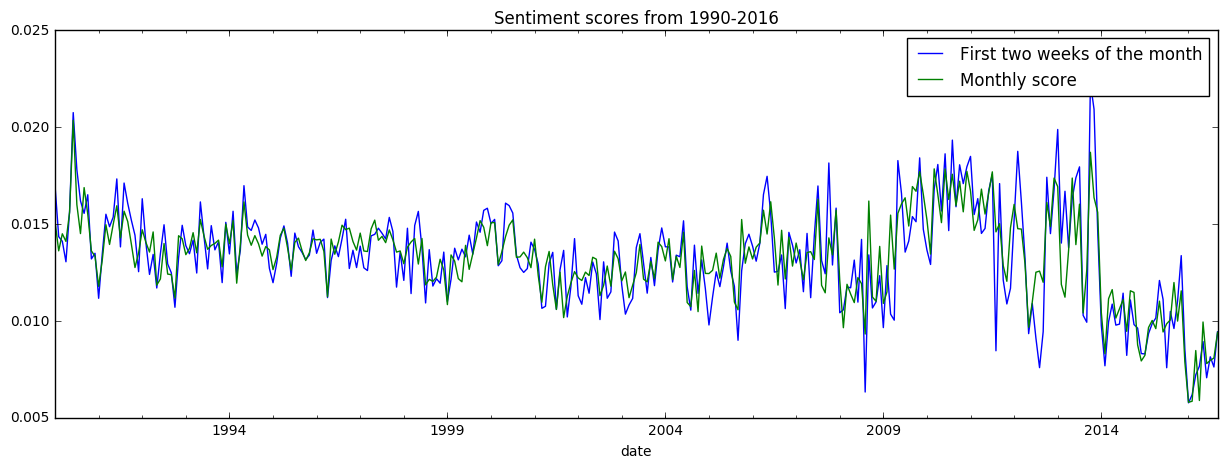

In [34]:
plt.figure(figsize=(15,5))
plt.title("Sentiment scores from 1990-2016")
first_two.avg_score.resample("MS").mean().plot(label="First two weeks of the month")
daily_sentiment.avg_score.resample("MS").mean().plot(label="Monthly score")
plt.legend()

And from there we can aggregate up to the monthly range, to match our CCI indicator:

In [35]:
monthly_sentiment = data_subset[["date", "score", "count"]].set_index("date").resample("MS").sum()
monthly_sentiment["avg_score"] = monthly_sentiment["score"] / monthly_sentiment["count"]
monthly_sentiment.head()

,score,count,avg_score
date,,,
1990-01-01,767.819,55530,0.013827
1990-02-01,675.360,55170,0.012241
1990-03-01,725.750,56620,0.012818
1990-04-01,826.457,62133,0.013301
1990-05-01,796.319,56484,0.014098


In [ ]:
daily_sentiment.to_csv("./monthly_sentiment_1990_2016.csv")